In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
loans = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", sheet_name='Data')

Let us check the head of the file.

In [3]:
# displaying the dataset
loans.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Below is a data description.

__ID__:	Customer ID							
__Age__:	Customer's age in completed years							
__Experience__:	#years of professional experience							
__Income__:	Annual income of the customer (in thousands)							
__ZIPCode__:	Home Address ZIP code.							
__Family__:	Family size of the customer							
__CCAvg__:	Avg. spending on credit cards per month (in thousands)							
__Education__:	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
__Mortgage__:	Value of house mortgage if any. (in thousands)							
__Personal Loan__:	Did this customer accept the personal loan offered in the last campaign?							
__Securities Account__:	Does the customer have a securities account with the bank?							
__CD Account__:	Does the customer have a certificate of deposit (CD) account with the bank?							
__Online__:	Does the customer use internet banking facilities?							
__CreditCard__:	Does the customer use a credit card issued by UniversalBank?							

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Here we can see that the dataset contains 5000 entries and 14 columns.

In [5]:
#Looking at various statistics of the data
loans.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


__DATA CLEANING__

Now, we do some data cleaning
We see that the minimum value in 'Experience' column of the dataset is negative. 
So let's find out how many negatives values the Experience column have.

In [6]:

loans[loans['Experience']<0]['Experience'].count()

52

Experience should be strongly correlated with age. Let's check that.

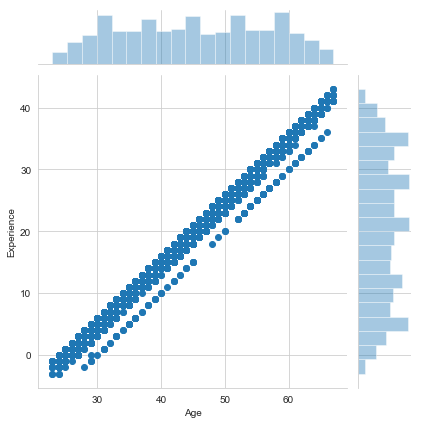

In [7]:
sns.set_style('whitegrid')
sns.jointplot(data=loans, x='Age', y='Experience')

In [8]:
# Evaluating the age range of those with negtive experience
loans[loans['Experience']<0]['Age'].value_counts()

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

The subset of the dataset with negative experience is not significant.
One can substitute those negative values with the mean of the population. 
But it would be more precise if we substitute the negative values with the mean
of clients whose age is less than or equal to 30.

In [9]:
q=int(np.ceil(loans[loans['Age']<=29]['Experience'].mean()))

In [10]:
# Since there are only three negative values (-3,-2,-1) we only replace this three values
loans['Experience'].replace(to_replace=[-3,-2,-1], value=q, inplace=True)

In [11]:
# Now we can check if the 'Experience' column is positive
loans[loans['Experience']<0]['Experience'].count()

0

In [12]:
# The columns 'ID' and 'ZIP Code' are not needed for your prediction so we can remove them.
loans.drop(columns=['ID', 'ZIP Code'], axis=1, inplace=True)

In [13]:
#checking the columns again
loans.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [14]:
#checking if any column is zero.
loans.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [15]:
loans.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

__EXPLORATORY DATA ANALYSIS__

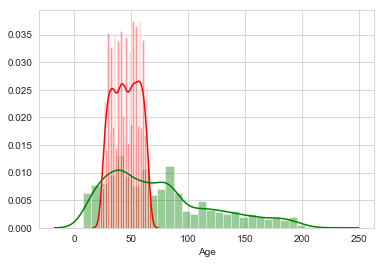

In [16]:
sns.distplot(loans['Income'], bins=30, color='g')
sns.distplot(loans['Age'], bins=30, color='r')

We see that the mean and the median of age is around 50. The mean and median of income is approximately 70. 


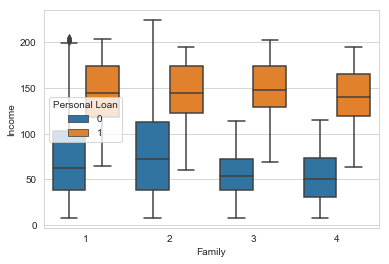

In [17]:
sns.boxplot(data=loans, x='Family', y='Income', hue='Personal Loan')

__Observations__.  High income is positively associated with personal loan and family size is somehow irrelevant with personal loan. We can also observe that families with income less than 110K are less likely get a loan.

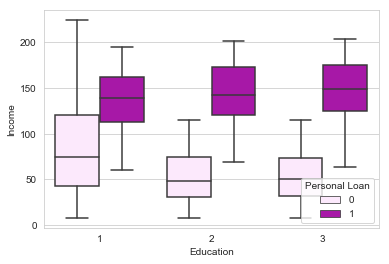

In [18]:
sns.boxplot(data=loans, x='Education', y='Income', hue='Personal Loan', color='m')

__Observations__. It is interesting to note that among families without a loan those with undergraduate degree(category 1) have higher income on average then those with graduate(category 2) and advanced/professional(category 3) degrees.
For families with a loan it seems that the average income is slightly increasing with respect to education.

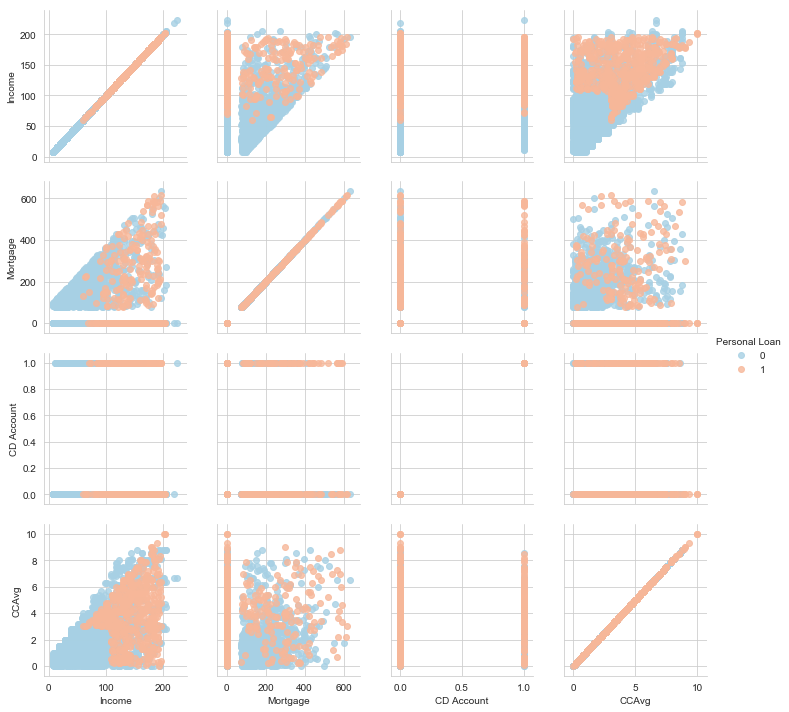

In [19]:
g = sns.PairGrid(data=loans, vars=['Income', 'Mortgage', 'CD Account', 'CCAvg'],
                 hue='Personal Loan', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

__Observations__. This set of pairplots also confirm that clients who have a personal loan also have a high income. In addition, clients with higher income tend to have higher mortgage.

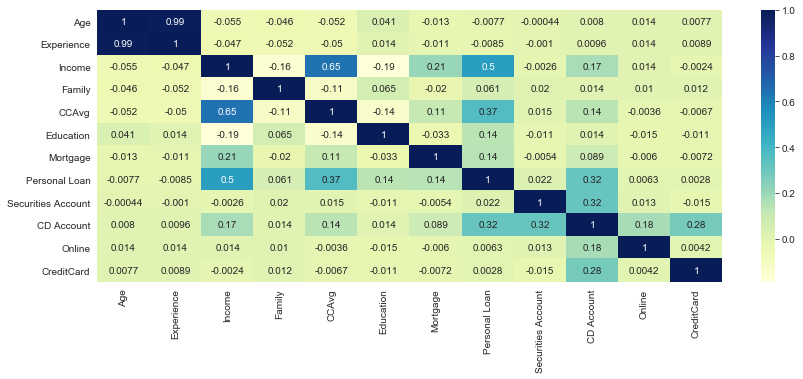

In [20]:
plt.figure(figsize=(14,5))

corr=loans.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

__Observations__. From the above correlation heatmap we see that experience and age are strongly correlated. Also,  average credit card spending is moderately correlated with income and slightly correlated with personal loan.

__PREDICTIONS__

We will apply several statistical tests to the dataset and choose the best model. We start

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=loans.drop('Personal Loan', axis=1)

In [23]:
y=loans['Personal Loan']

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logistic=LogisticRegression()

In [27]:
logistic.fit(X_train, y_train)

C:\Users\farru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
logistic.score(X_test,y_test)

0.9486666666666667

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
reg_pred=logistic.predict(X_test)

print(confusion_matrix(reg_pred, y_test))
print('\n')
print(classification_report(reg_pred, y_test))

Now we apply Decision Tree Algorithm

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree=DecisionTreeClassifier(criterion='entropy')

In [33]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
dtree_pred=dtree.predict(X_test)

In [35]:
dtree.score(X_test, y_test) 

0.9873333333333333

In [36]:
print(confusion_matrix(dtree_pred, y_test))
print('\n')
print(classification_report(dtree_pred, y_test))

[[1334   10]
 [   9  147]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1344
           1       0.94      0.94      0.94       156

   micro avg       0.99      0.99      0.99      1500
   macro avg       0.96      0.97      0.97      1500
weighted avg       0.99      0.99      0.99      1500



Now we apply Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
random_forest= RandomForestClassifier(n_estimators=40, criterion='entropy')

In [43]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
random_forest.score(X_test, y_test)

0.988

In [45]:
rfc_pred= random_forest.predict(X_test)

In [46]:
print(confusion_matrix(rfc_pred, y_test))
print('\n')
print(classification_report(rfc_pred, y_test))

[[1341   16]
 [   2  141]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1357
           1       0.90      0.99      0.94       143

   micro avg       0.99      0.99      0.99      1500
   macro avg       0.95      0.99      0.97      1500
weighted avg       0.99      0.99      0.99      1500



In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
naive_bayes= GaussianNB()

In [49]:
naive_bayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
naive_bayes.score(X_test, y_test)

0.892

In [51]:
nb_pred=naive_bayes.predict(X_test)

In [52]:
print(confusion_matrix(nb_pred, y_test))
print('\n')
print(classification_report(nb_pred, y_test))

[[1244   63]
 [  99   94]]


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1307
           1       0.60      0.49      0.54       193

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.76      0.72      0.74      1500
weighted avg       0.88      0.89      0.89      1500



In [53]:
d = {'Classifier': ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier', 'Naive Bayes' ], 
     'Accuracy': [logistic.score(X_test,y_test),
              dtree.score(X_test,y_test),
              random_forest.score(X_test, y_test), 
              naive_bayes.score(X_test,y_test)]}
df = pd.DataFrame(data=d)
print(df)

                 Classifier  Accuracy
0       Logistic Regression  0.948667
1             Decision Tree  0.987333
2  Random Forest Classifier  0.988000
3               Naive Bayes  0.892000


We see that both Decision Tree and Random Forest Classifiers perform well with our model. We choose Random Forest Classifier since it has slightly better accuracy than Decision Tree.